<a href="https://colab.research.google.com/github/Komla/fastAI-/blob/main/deliverables_2_half_done.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install fastai --upgrade --use-feature=2020-resolver
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()


Usage:   
  pip3 install [options] <requirement specifier> [package-index-options] ...
  pip3 install [options] -r <requirements file> [package-index-options] ...
  pip3 install [options] [-e] <vcs project url> ...
  pip3 install [options] [-e] <local project path> ...
  pip3 install [options] <archive url/path> ...

no such option: --use-feature


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.activity.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fexperimentsandconfigs%20https%3a%2f%2fwww.googleapis.com%2fauth%2fphotos.native&response_type=code

Enter your authorization code:
4/1AY0e-g4a0IiQwtx6kNnHPYo8TZ-rS9hAtYBBrRehrkIBsRWRiXOCaifpiOw


In [3]:
!pip install fastprogress
from fastbook import *
from fastai.vision.widgets import *


In [4]:
!pip install -q jmd_imagescraper

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [5]:
root = '/content/gdrive/MyDrive/Datasets/'

In [ ]:
#from pathlib import Path
#root = Path().cwd()/"cars"



from jmd_imagescraper.core import * # dont't worry, it's designed to work with import *

# Adding parameters tothe images to be downloaded
#params = {
  #  "max_results": 30,             # this can go up to 477 at the time of writing
   # "img_size":    ImgSize.Cached, 
    #"img_type":    ImgType.Photo,
    #"img_layout":  ImgLayout.Square,
    #"img_color":   ImgColor.Purple
#}

#duckduckgo_search(root, "bmw", "bmw", max_results = 30)
#duckduckgo_search(root, "jeep", "jeeps", max_results = 30)
#duckduckgo_search(root, "toyota", "toyota", max_results = 30)
#duckduckgo_search(root, "mercedes-benz","mercedes-benz", max_results = 30)

In [6]:
%ls

gdrive/  sample_data/


In [ ]:
# This gets the destination to the root directory

#destination = Path(root)

#path = destination

In [7]:
path = root + 'cars'
path

'/content/gdrive/MyDrive/Datasets/cars'

In [8]:
fns = get_image_files(path)
fns

(#120) [Path('/content/gdrive/MyDrive/Datasets/cars/bmw/001_34ccd3b8.jpg'),Path('/content/gdrive/MyDrive/Datasets/cars/bmw/002_9a0dbaa9.jpg'),Path('/content/gdrive/MyDrive/Datasets/cars/bmw/003_cecc2945.jpg'),Path('/content/gdrive/MyDrive/Datasets/cars/bmw/004_794392e9.jpg'),Path('/content/gdrive/MyDrive/Datasets/cars/bmw/005_4e5ee627.jpg'),Path('/content/gdrive/MyDrive/Datasets/cars/bmw/006_e01a9af5.jpg'),Path('/content/gdrive/MyDrive/Datasets/cars/bmw/007_05f5cfd2.jpg'),Path('/content/gdrive/MyDrive/Datasets/cars/bmw/008_fd5cc7d5.jpg'),Path('/content/gdrive/MyDrive/Datasets/cars/bmw/009_6a0f0f08.jpg'),Path('/content/gdrive/MyDrive/Datasets/cars/bmw/010_244d7a93.jpg')...]

In [9]:
cars = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [10]:
dls = cars.dataloaders(path)

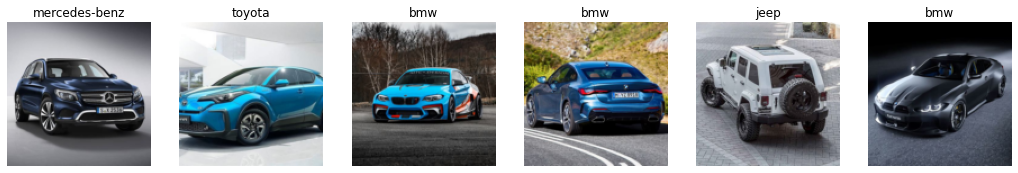

In [11]:
dls.valid.show_batch(max_n=6, nrows=1)

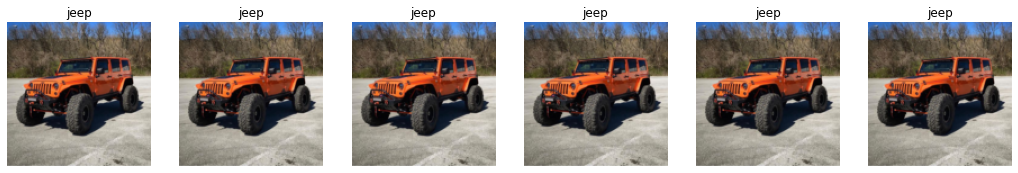

In [12]:
cars = cars.new(item_tfms=RandomResizedCrop(128, min_scale=9))
dls = cars.dataloaders(path)
dls.train.show_batch(max_n=6, nrows=1, unique=True)

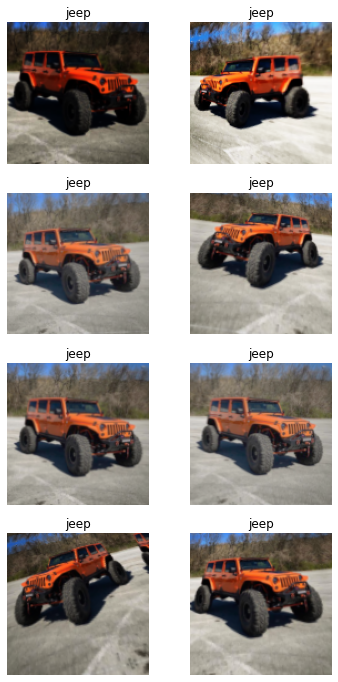

In [13]:
cars = cars.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2))
dls = cars.dataloaders(path)
dls.train.show_batch(max_n=8, nrows=4, unique=True)

In [14]:
metrics_list = [error_rate,accuracy,]
learn = cnn_learner(dls, resnet18, metrics=metrics_list)
learn.fine_tune(10)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,2.125682,2.678705,0.833333,0.166667,00:48


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,2.077817,2.466723,0.791667,0.208333,00:09
1,2.200135,2.252277,0.750000,0.250000,00:08
2,2.235558,2.061205,0.750000,0.250000,00:08
3,2.155003,1.881533,0.708333,0.291667,00:08
4,2.077252,1.825388,0.708333,0.291667,00:08
5,2.005360,1.753239,0.750000,0.250000,00:08
6,1.886485,1.667055,0.750000,0.250000,00:08
7,1.764943,1.597409,0.708333,0.291667,00:08
8,1.696035,1.532687,0.708333,0.291667,00:08
9,1.607074,1.487704,0.750000,0.250000,00:08


In [15]:
learn.save('stage-1')

Path('models/stage-1.pth')

In [16]:
learn.unfreeze()

SuggestedLRs(lr_min=0.0006309573538601399, lr_steep=0.0003981071640737355)

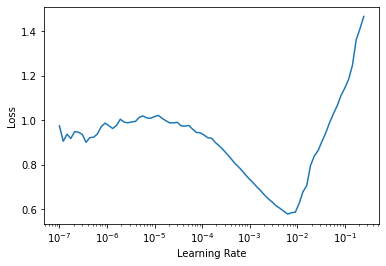

In [17]:
learn.lr_find()

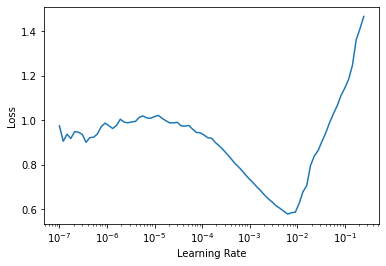

In [20]:
learn.recorder.plot_lr_find()

In [21]:
learn.save('stage-2')

Path('models/stage-2.pth')

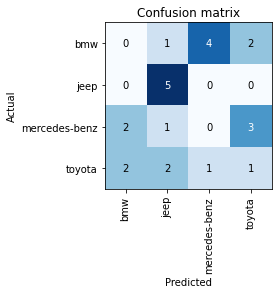

In [22]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

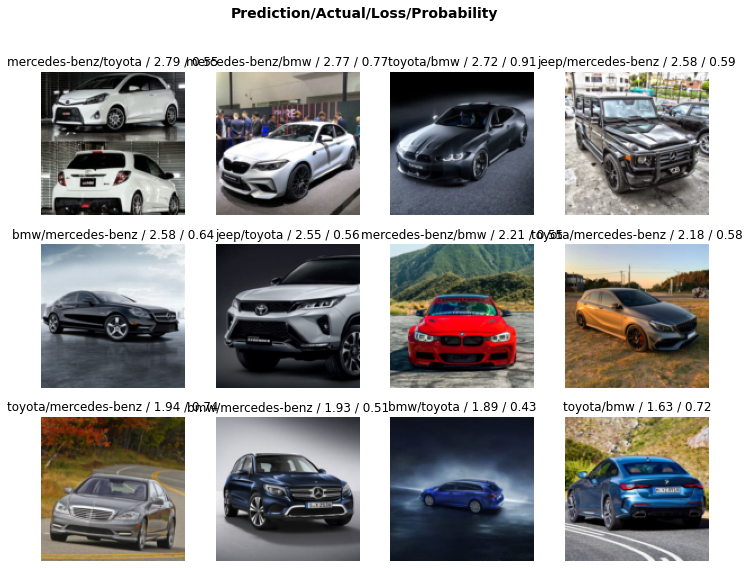

In [23]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_top_losses(12)

In [24]:
interp = ClassificationInterpretation.from_learner(learn)
interp.most_confused(10)

[]

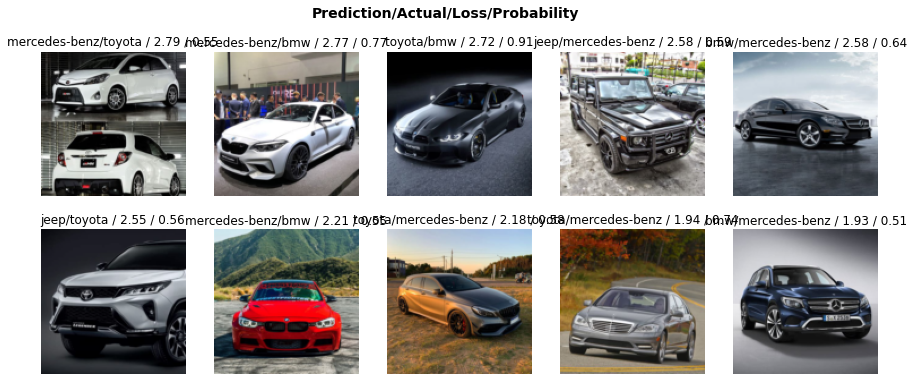

In [25]:
interp.plot_top_losses(10, nrows=2)

In [26]:
learn.fit_one_cycle(10)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,1.088391,1.431944,0.708333,0.291667,00:09
1,1.035651,1.276569,0.666667,0.333333,00:09
2,0.932420,1.116941,0.541667,0.458333,00:09
3,0.798763,1.302268,0.541667,0.458333,00:08
4,0.765014,1.461743,0.500000,0.500000,00:08
5,0.694059,1.555628,0.458333,0.541667,00:08
6,0.680450,1.858989,0.416667,0.583333,00:08
7,0.654426,2.079108,0.541667,0.458333,00:08
8,0.621409,2.208391,0.583333,0.416667,00:08
9,0.587125,2.139273,0.583333,0.416667,00:08


In [28]:
learn.save('stage-3')

Path('models/stage-3.pth')

In [27]:
metrics_list = [error_rate,accuracy,]
learn = cnn_learner(dls, resnet34, metrics=metrics_list)
learn.fine_tune(10)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,2.397707,7.390123,0.791667,0.208333,00:10


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,2.329543,5.728556,0.791667,0.208333,00:15
1,2.547507,4.418010,0.791667,0.208333,00:14
2,2.315488,3.763254,0.708333,0.291667,00:15
3,2.211523,3.485729,0.666667,0.333333,00:14
4,2.023196,3.131582,0.708333,0.291667,00:14
5,1.850005,2.719974,0.708333,0.291667,00:14
6,1.727140,2.452154,0.708333,0.291667,00:14
7,1.639400,2.281786,0.666667,0.333333,00:14
8,1.529752,2.142938,0.666667,0.333333,00:14
9,1.454237,2.048965,0.583333,0.416667,00:14


In [29]:
learn.save('stage-4')

Path('models/stage-4.pth')

In [30]:
learn.unfreeze()

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,2.598366,3.131640,0.666667,0.333333,00:07
1,2.272405,15.625710,0.791667,0.208333,00:07
2,1.958730,23.341698,0.791667,0.208333,00:06
3,1.748640,27.743652,0.708333,0.291667,00:06
4,1.663576,24.483589,0.625000,0.375000,00:06
5,1.603343,23.312841,0.583333,0.416667,00:06
6,1.591501,15.856997,0.583333,0.416667,00:06
7,1.522272,10.299053,0.625000,0.375000,00:06
8,1.450676,7.817931,0.666667,0.333333,00:06
9,1.363967,6.529561,0.583333,0.416667,00:06


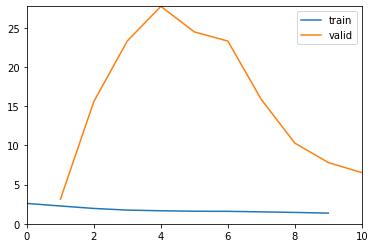

In [31]:
metrics_list = [error_rate,accuracy,]
learn = cnn_learner(dls, resnet18, metrics=metrics_list)
learn.fit_one_cycle(10, slice(5e-3,5e-2),cbs=[ShowGraphCallback()])

SuggestedLRs(lr_min=0.003981071710586548, lr_steep=9.12010818865383e-07)

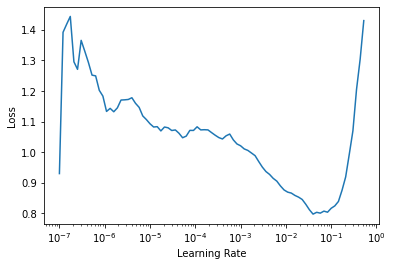

In [32]:
learn.lr_find()

In [33]:
learn.save('stage-5')

Path('models/stage-5.pth')

In [35]:
learn.unfreeze()

In [38]:
#hide_output
cleaner = ImageClassifierCleaner(learn)
cleaner

In [ ]:
#Unhide this if you want to implement the img cleaner
#for idx in cleaner.delete(): cleaner.fns[idx].unlike()
#for idx,bmw in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/bmw)

In [39]:
learn.export()

In [40]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [41]:
learn_inf = load_learner(path/'export.pkl')

In [43]:
learn_inf

In [44]:
#hide_output
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

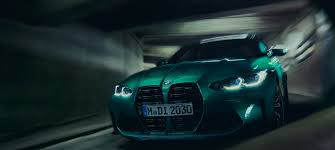

In [46]:
img = PILImage.create(btn_upload.data[-1])
img

In [67]:
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
out_pl

Output()

In [68]:
pred,pred_idx,probs = learn_inf.predict(img)

In [ ]:
#hide_output
#lbl_pred = widgets.Label()
#lbl_pred

In [69]:
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred

Label(value='Prediction: bmw; Probability: 0.5696')

In [70]:
btn_run = widgets.Button(description='Classify')
btn_run

Button(description='Classify', style=ButtonStyle())

In [71]:
def on_click_classify(change):
  img = PILImage.create(btn_upload.data[-1])
  out_pl.clear_output()
  with out_pl: display(img.to_thumb(128,128))
  pred,pred_idx,probs = learn_inf.predict(img)
  lbl_pred.value = f'Prediction: {pred}; Probability{ probs[pred_idx]: .04f}'

  btn_run.on_click(on_click_classify)

In [72]:
#hide
#Putting back btn_upload to a widget for next cell
btn_upload = widgets.FileUpload()

In [62]:
from ipywidgets import widget

In [74]:
#VBox([widgets.label('Select your car'), 
 #     btn_upload, btn_run, out_pl, lbl_pred])
#item = widgets.Label('Select your car'), btn_upload, btn_run, lbl_pred)
#widgets.Box(item)#
#items = [widgets.Label(str(i)) for i in range(4)]
#left_box = widgets.VBox([items[0], items[1]])
#right_box = widgets.VBox([items[2], items[3]])
#widgets.HBox([left_box, right_box])
#hide_output
VBox([widgets.Label('Select your car!'), 
      btn_upload, btn_run, out_pl, lbl_pred])


In [ ]:
#hide
# !pip install voila
# !jupyter serverextension enable --sys-prefix voila 